## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [85]:
import warnings
warnings.filterwarnings('ignore')
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [86]:
# reading the CSV file into pandas dataframe
day_df = pd.read_csv("day.csv")

In [87]:
# shape of the data
day_df.shape

(730, 16)

In [88]:
# giving the data type of indivigual column
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [89]:
# giving the 5point summery of the data
day_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


* As pre the analysis temp,hum,windspeed are more or less following stander deviation

In [90]:
# Check top few records to get a feel of the data structure
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [91]:
len(day_df[day_df['casual']+day_df['registered']==day_df['cnt']].index)

730

* checking whether the sum of casual and register is cnt or not the total row count is comming as 730 which is equal to the total row count in the dataset that is 730

In [92]:
# null value check
day_df.isnull().sum(axis=0)/len(day_df.index)*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

* checking whether any null value exist in the data set or not it is not there

In [93]:
day_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

* droping instant as it is sequence value ,dteday as the date itself is statisticaly insignificant but weekday,workingday are.
* droping casual and register as cnt is enough for both or them.

## Step 2: Visualising the Data

**understanding the data**.
- If there is some obvious multicollinearity going on, one can find it here
- if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn

<Figure size 1080x2160 with 0 Axes>

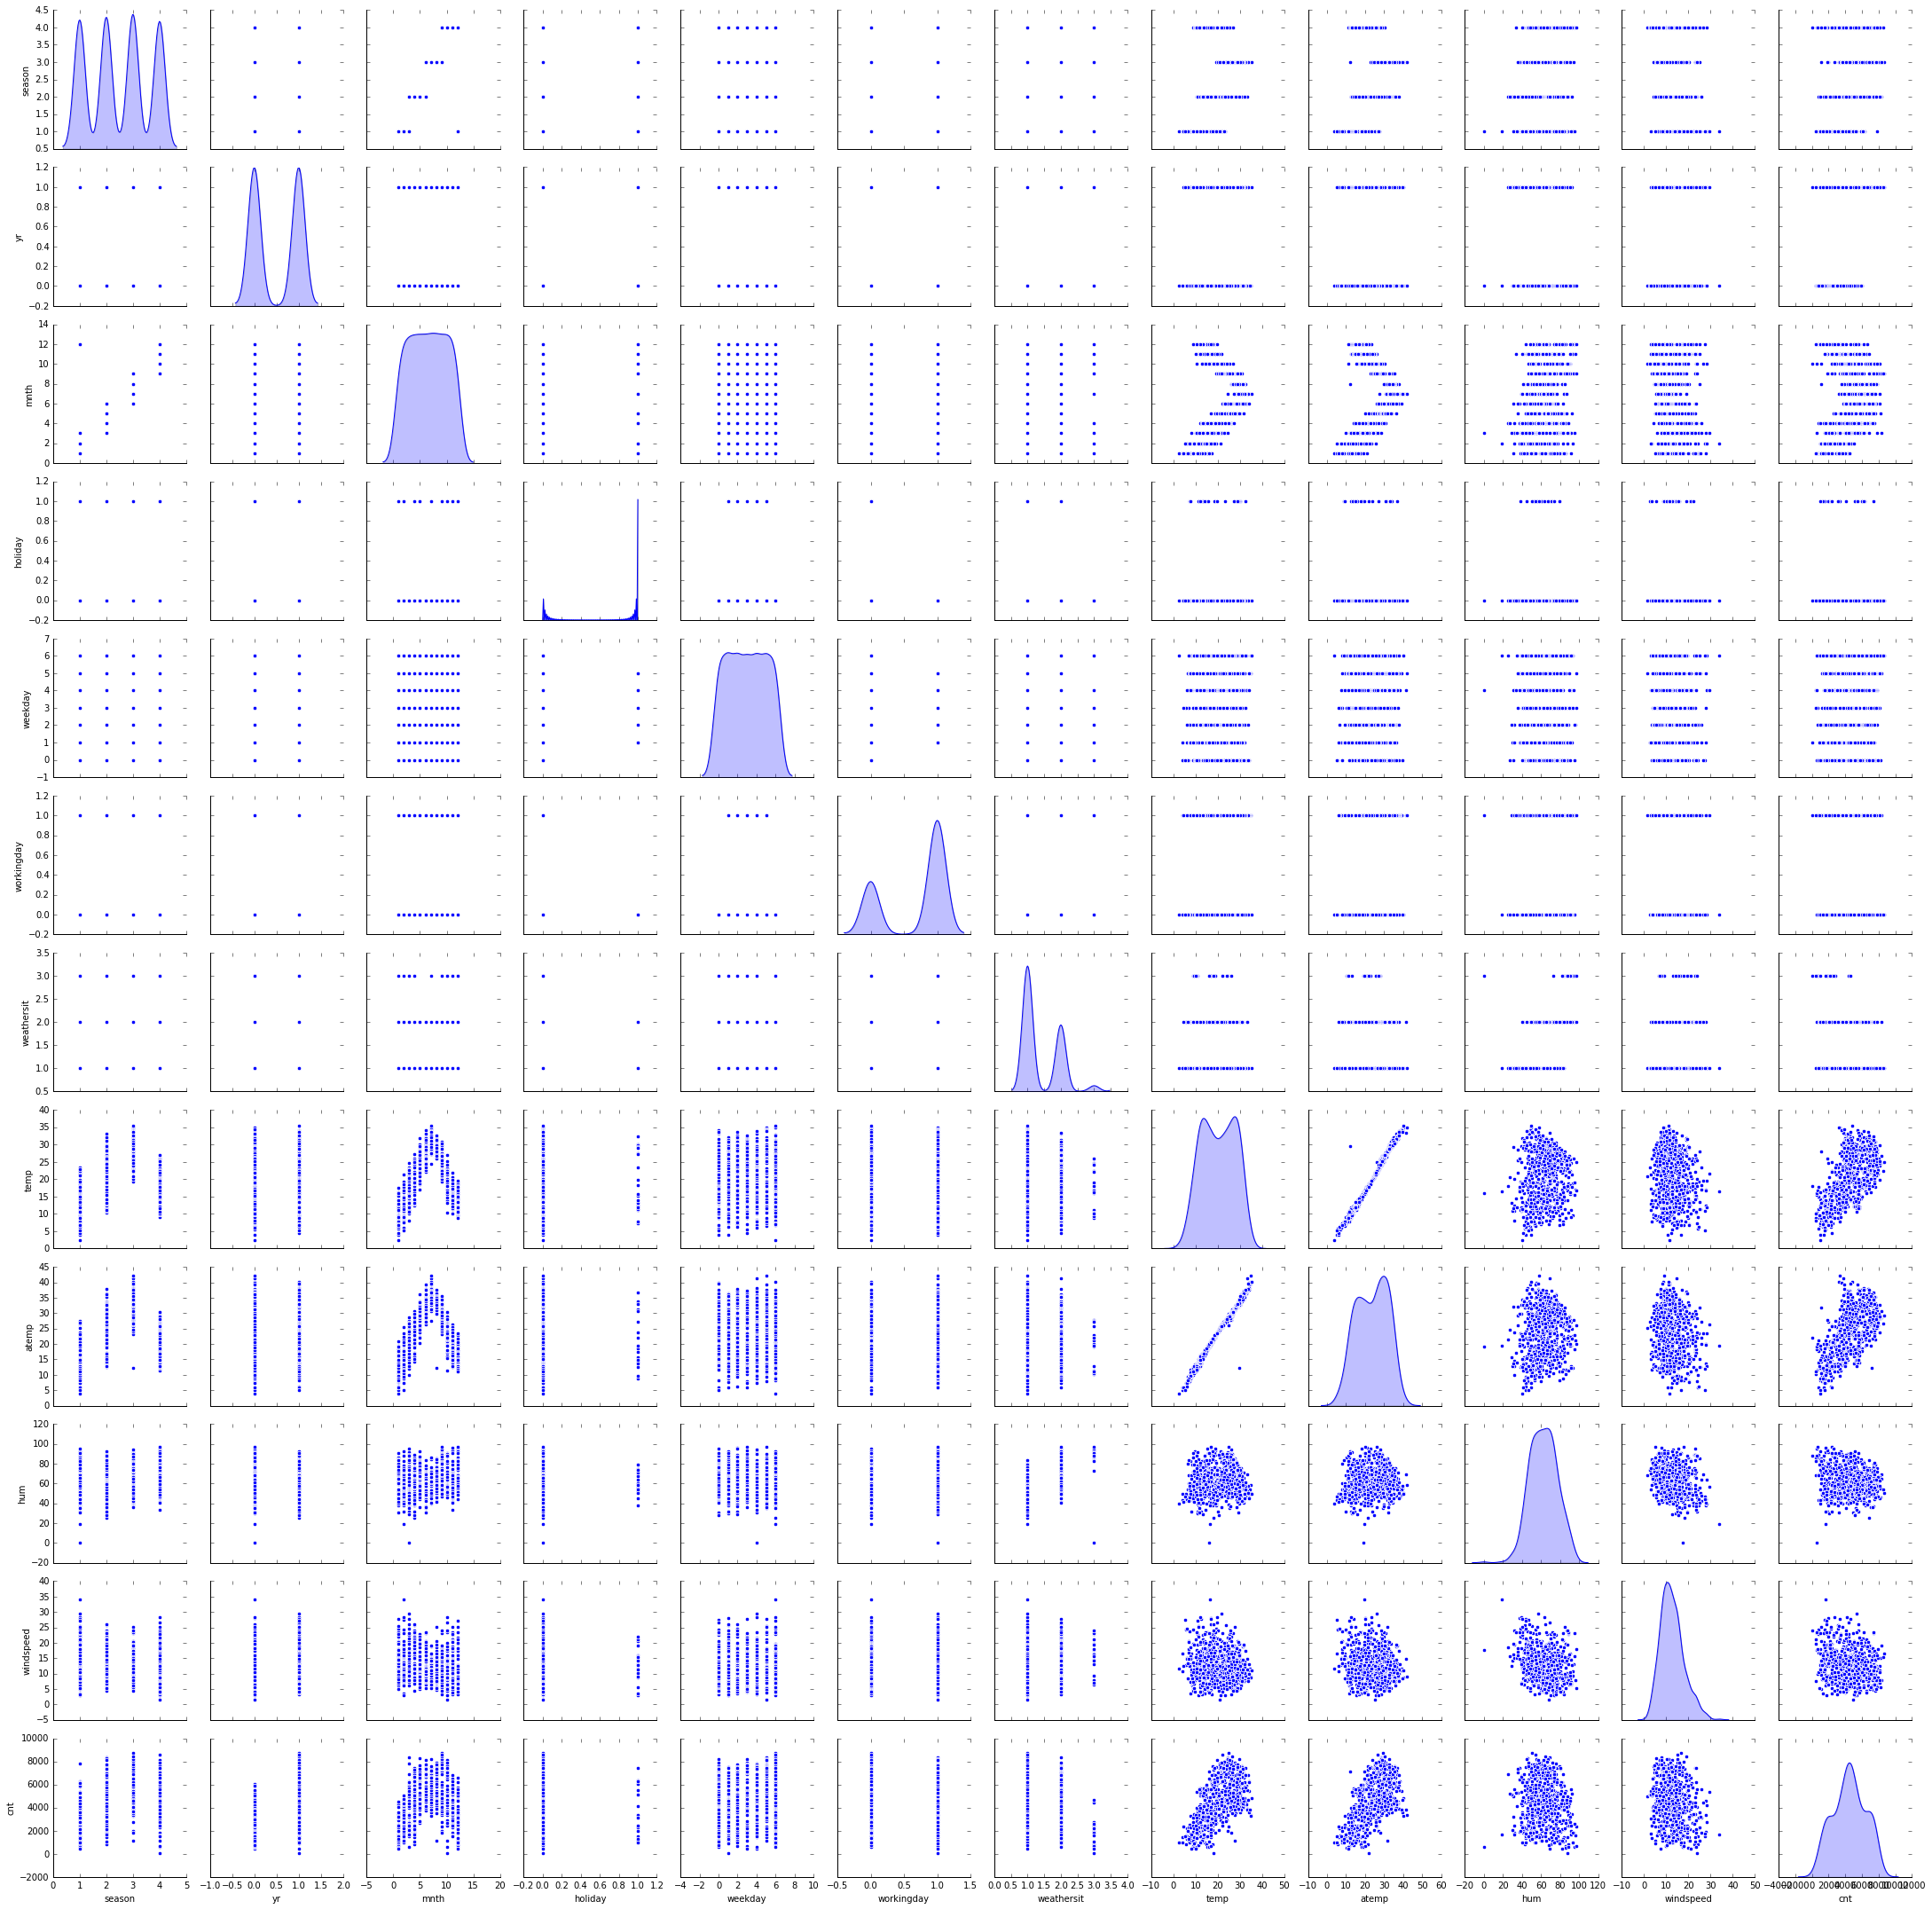

In [94]:
# drawing pair plot
plt.figure(figsize = (15, 30))
sns.pairplot(day_df, diag_kind = 'kde')
plt.show()

* temp and atemp highly correlated
* relevent for assignment question

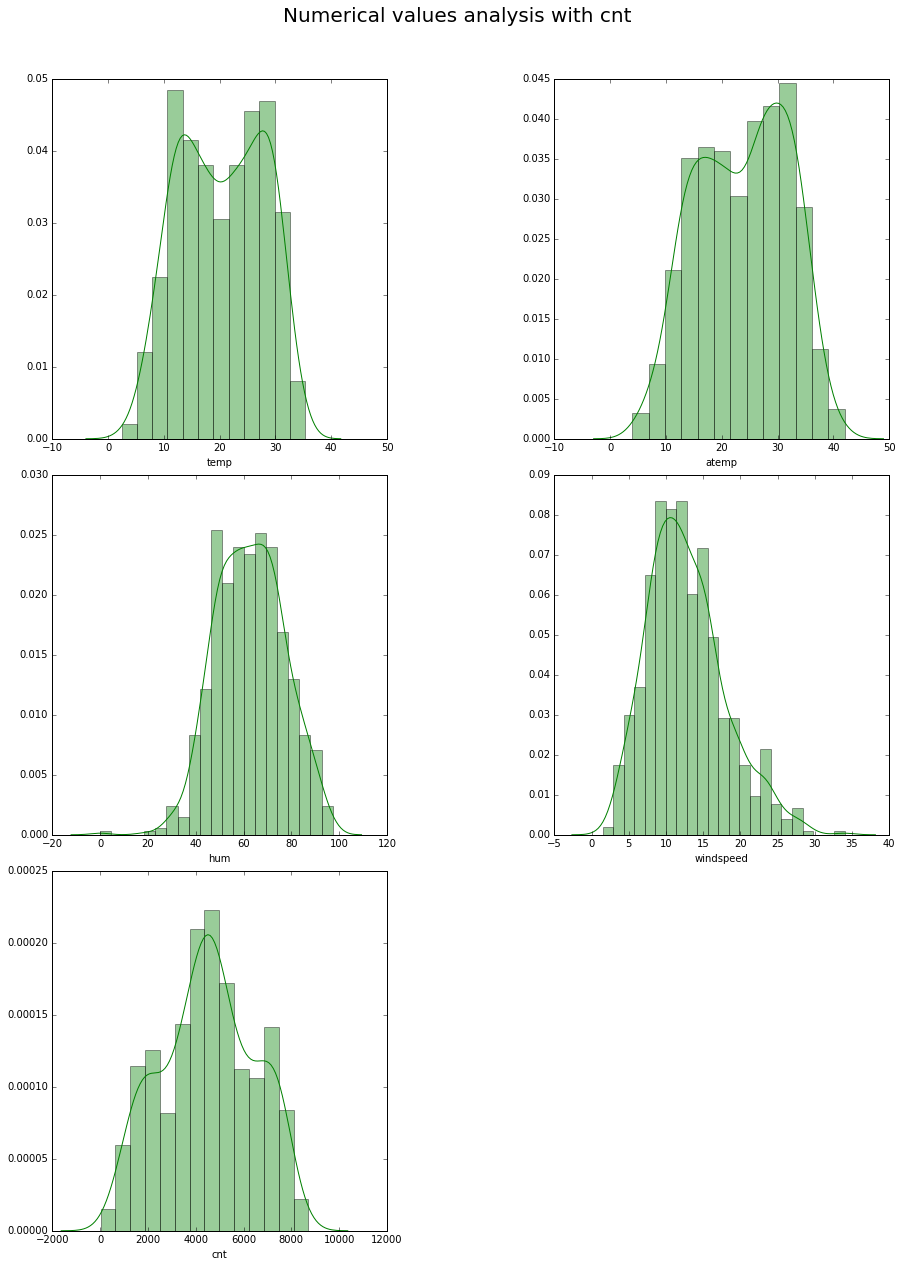

In [95]:
plt.figure(figsize = (15, 20))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  0.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis with cnt", y = .95, fontsize=20)
for feature in day_df.columns: 
    if str(feature) in ['temp','atemp','hum','windspeed','cnt']:  
        plt.subplot(3, 2, count+1)
        sns.distplot(day_df[feature],color='green')
        count=count+1
plt.show()

#### as per the univarient analysis of the continious veriable 
* one can say atemp and temp has more or less same pattern with two highest point.
* all the other continious column hum ,wind speed cnt follows normal distribution.  

In [96]:
corr = day_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index().head(20)

,index,Var1,Var2,Correlation
0,103,atemp,temp,0.99
1,24,mnth,season,0.83
2,140,cnt,atemp,0.63
3,139,cnt,temp,0.63
4,114,hum,weathersit,0.59
5,133,cnt,yr,0.57
6,132,cnt,season,0.40
7,96,atemp,season,0.34
8,84,temp,season,0.33
9,138,cnt,weathersit,0.30


* as verified by the graph as well the corr between temp and atemp is very high from correletion matrix

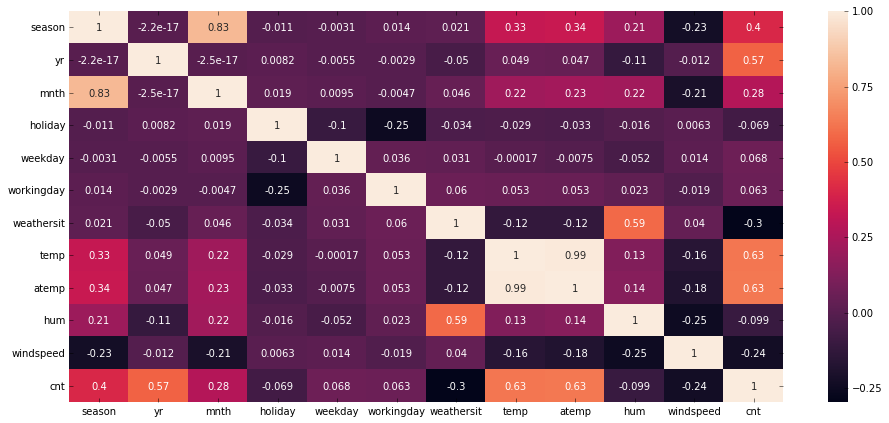

In [97]:
plt.figure(figsize=(16,7))
corrMatrix = day_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

* heat map of the correletion matrix.

In [98]:
count=0
for feature in day_df.columns: 
    if str(feature) in ['temp','atemp','hum','windspeed','cnt']:
        print(str(feature)+' skewness '+str(day_df[feature].skew()))
        count=count+1

temp skewness -0.05718748619696199
atemp skewness -0.13370861358035466
hum skewness -0.06747586253218554
windspeed skewness 0.6763140387852972
cnt skewness -0.04958060487648213


* atemp is more negetively skew than temp.
* all the other countinious column has negligeble skewness

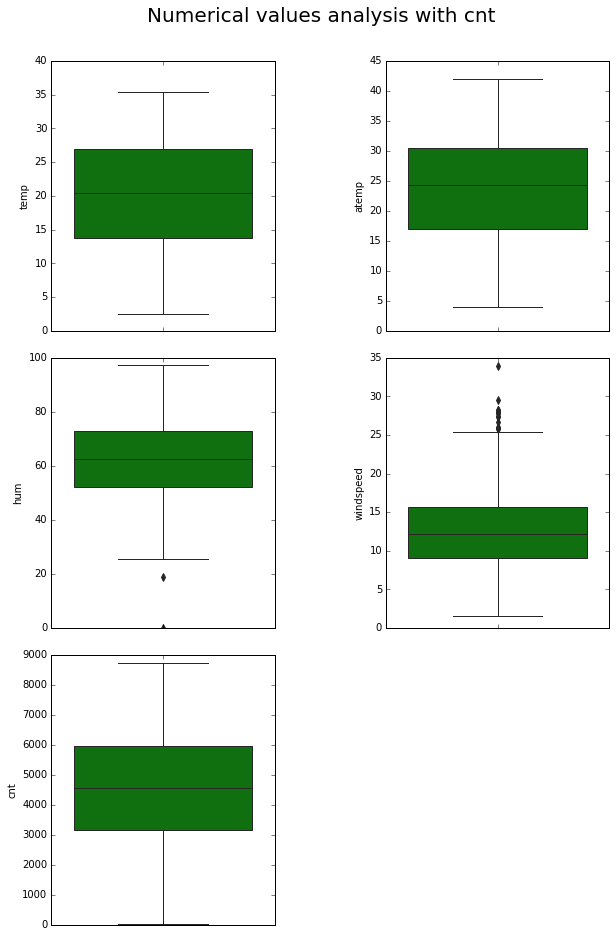

In [99]:
plt.figure(figsize = (10, 15))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  0.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis with cnt", y = 0.95, fontsize=20)
for feature in day_df.columns: 
    if str(feature) in ['temp','atemp','hum','windspeed','cnt']:   
        plt.subplot(3, 2, count+1)
        sns.boxplot(y = feature,data = day_df,color='green')
        count=count+1
plt.show()

* as per outlier goes windspeed has more hum has less.
* all other continious column has got no outlier

In [100]:
day_df.drop(['atemp'],axis=1,inplace=True)

* as the skewness is more in atemp than temp droping it. 

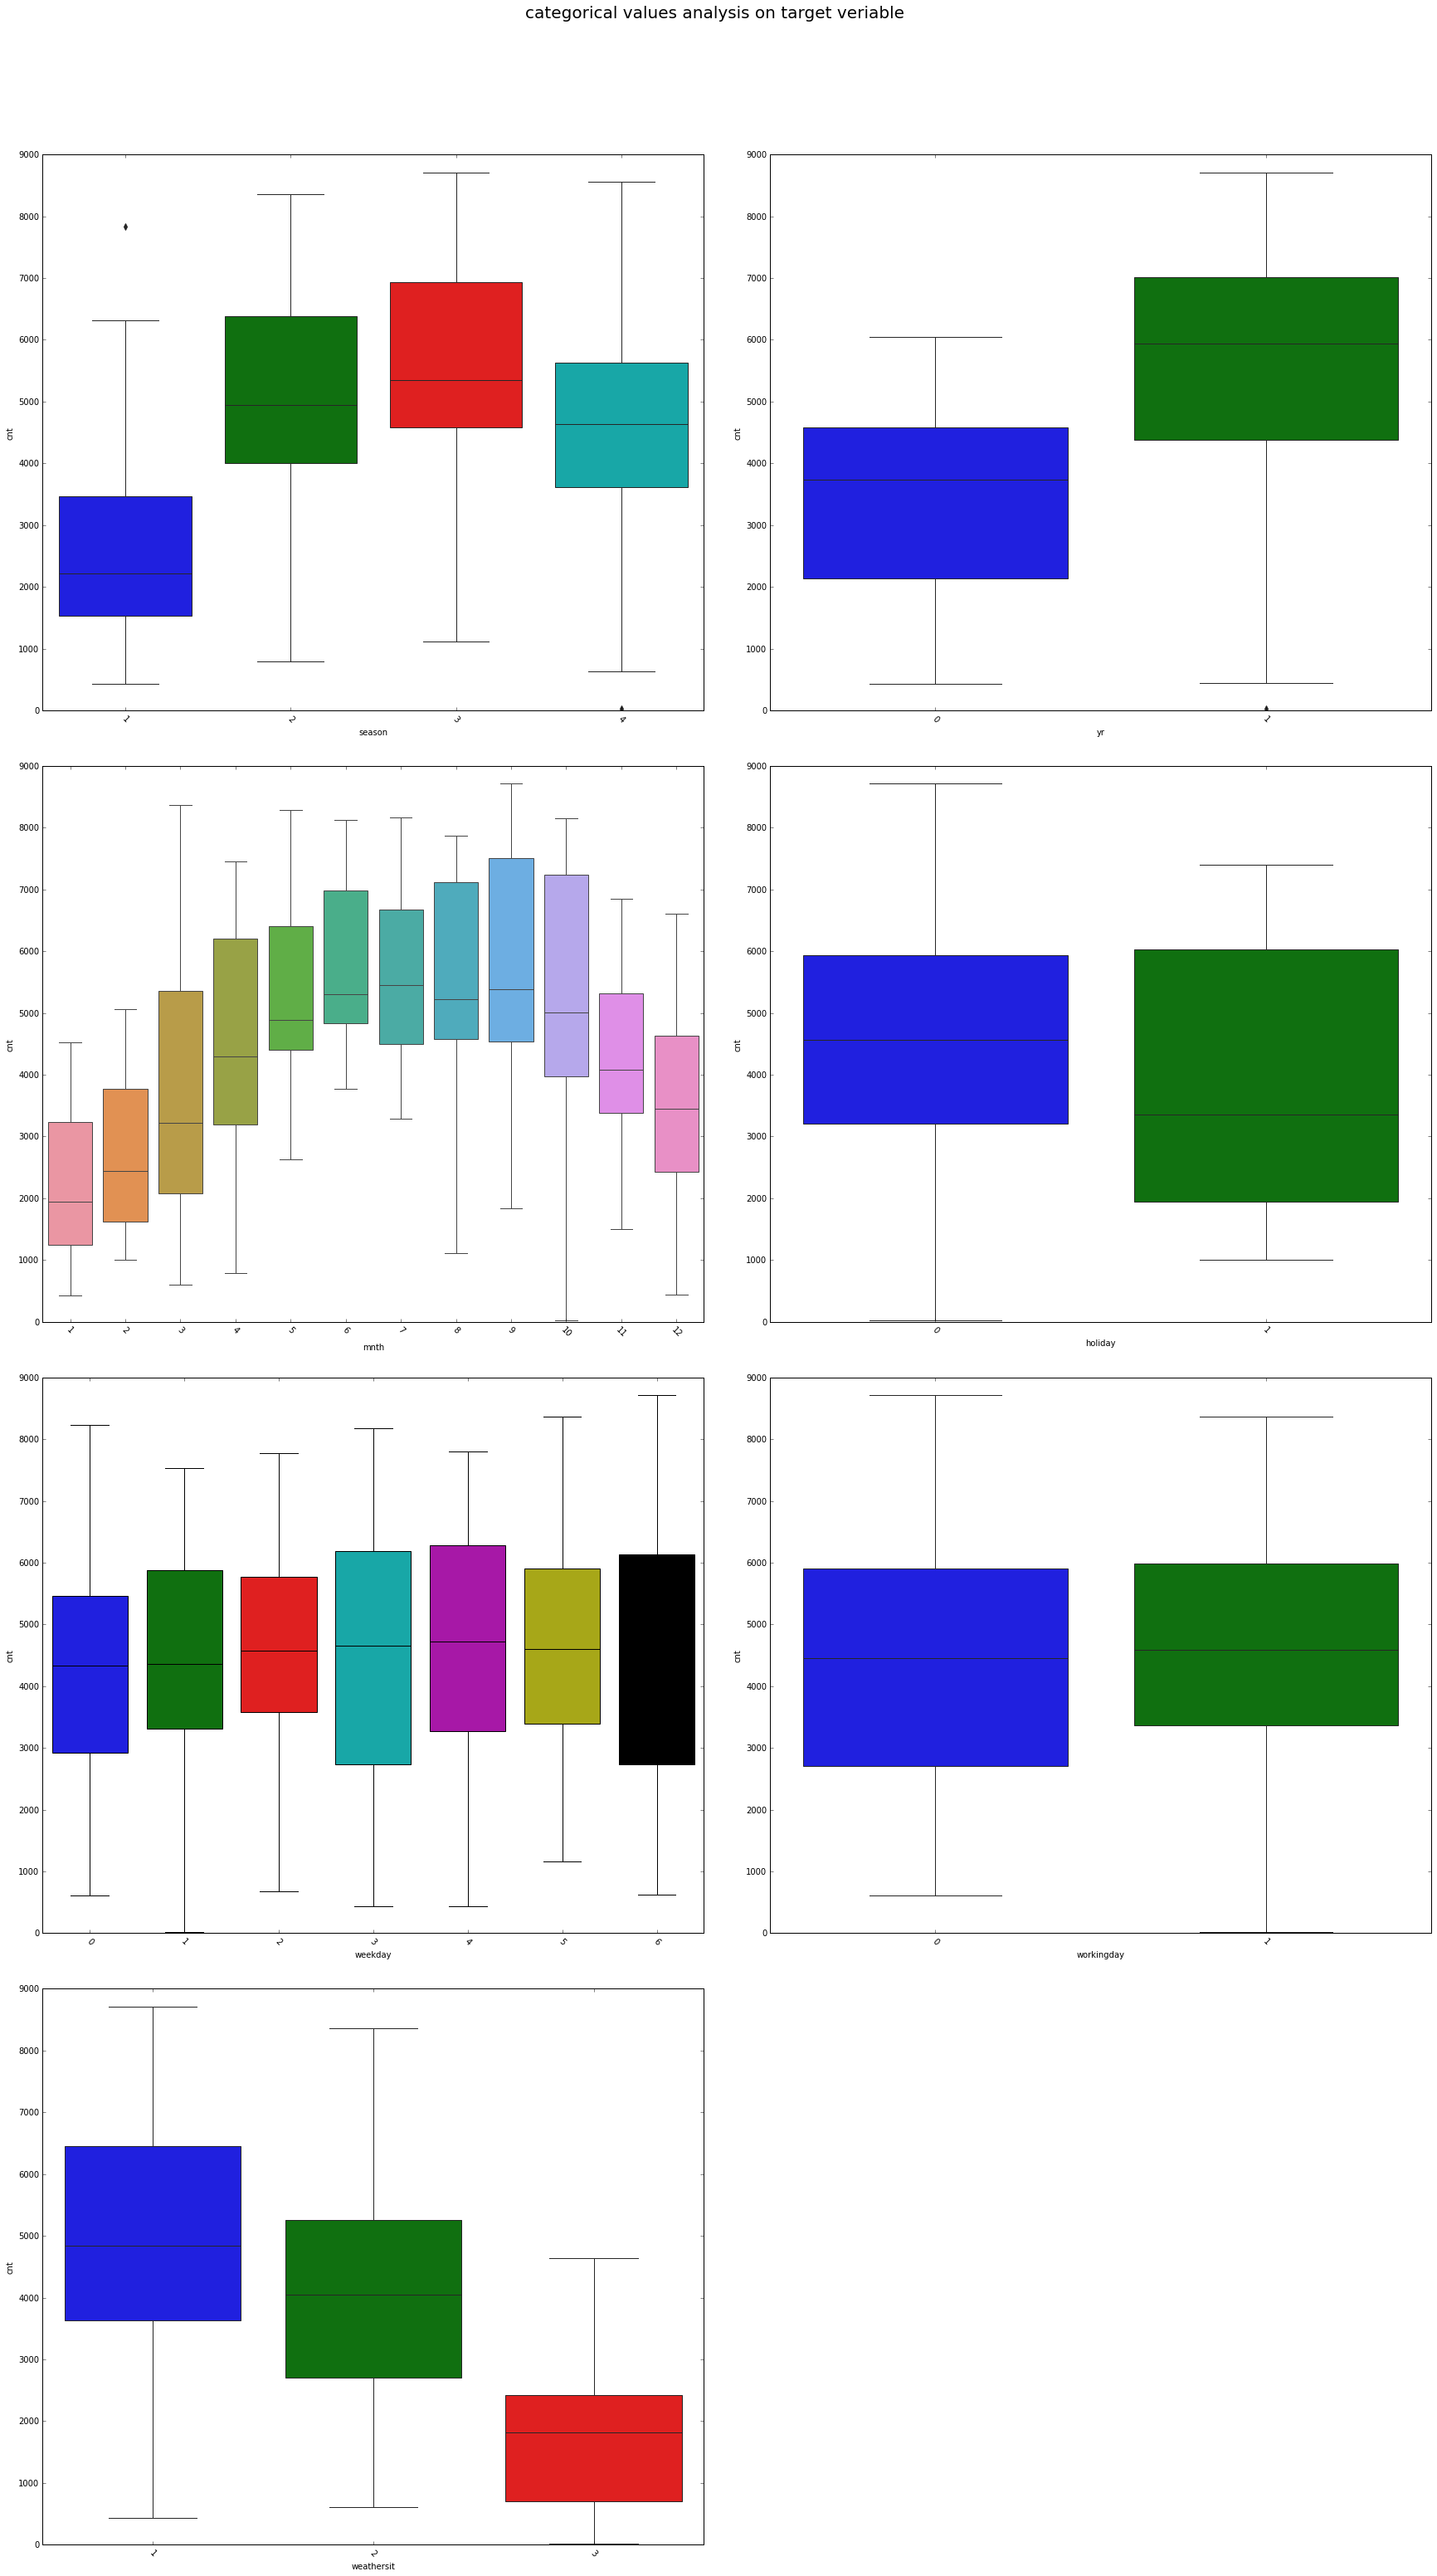

In [101]:
plt.figure(figsize = (30, 50))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .1,    # the amount of width reserved for blank space between subplots
    hspace =  0.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("categorical values analysis on target veriable", y = .95, fontsize=20)
for feature in day_df.columns: 
    if str(feature) not in ['temp','atemp','hum','windspeed','cnt']:
        plt.subplot(4, 2, count+1)
        sns.boxplot(x = feature, y = 'cnt', data = day_df)
        plt.xticks(rotation=-45)
        count=count+1
plt.show()

#### as part of the bivarient analysis or the categorial variable with the target veriable cnt
* one can say for Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds bike sell is list and for Clear, Few clouds, Partly cloudy, Partly cloudy bike sell is more.
* for weekend ,holiday and week day maximum bike similer but lest bike got sold in weekend or holiday
* from monday to sunday the bike sell is more or less similer but firday it is max and thusdat and sun day it is least.
* if it is a holiday bike sell is least.
* in the month of january the bike sell is least and in the month of september the sell is max.
* in 2019 the sell increased from 2018
* in spring bike spring is least in fall the bike sell is maximum.

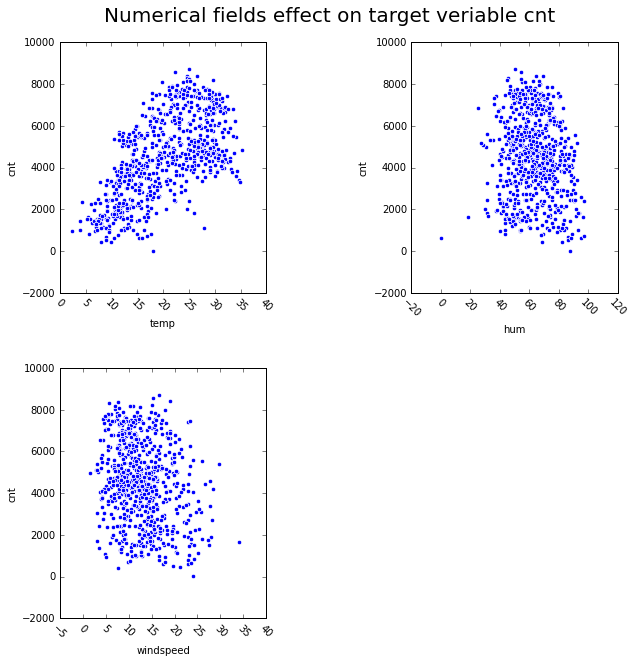

In [102]:
plt.figure(figsize = (10, 10))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .7,    # the amount of width reserved for blank space between subplots
    hspace =  0.3    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical fields effect on target veriable cnt", y = .95, fontsize=20)
for feature in day_df.columns: 
    if str(feature) in ['temp','atemp','hum','windspeed']:
        plt.subplot(2, 2, count+1)
        sns.scatterplot(x=feature, y='cnt', data=day_df)
        plt.xticks(rotation=-45)
        count=count+1
plt.show()

#### as part of the bivarient analysis or the continious variable with the target veriable cnt
* as the temperature increase the bike sell increase
* for increasing humidity between 60 to 100 the bike sell decrease drastically.
* for the wind speed between 10 to 30 the bike sell decrease drastically

<Figure size 1080x2160 with 0 Axes>

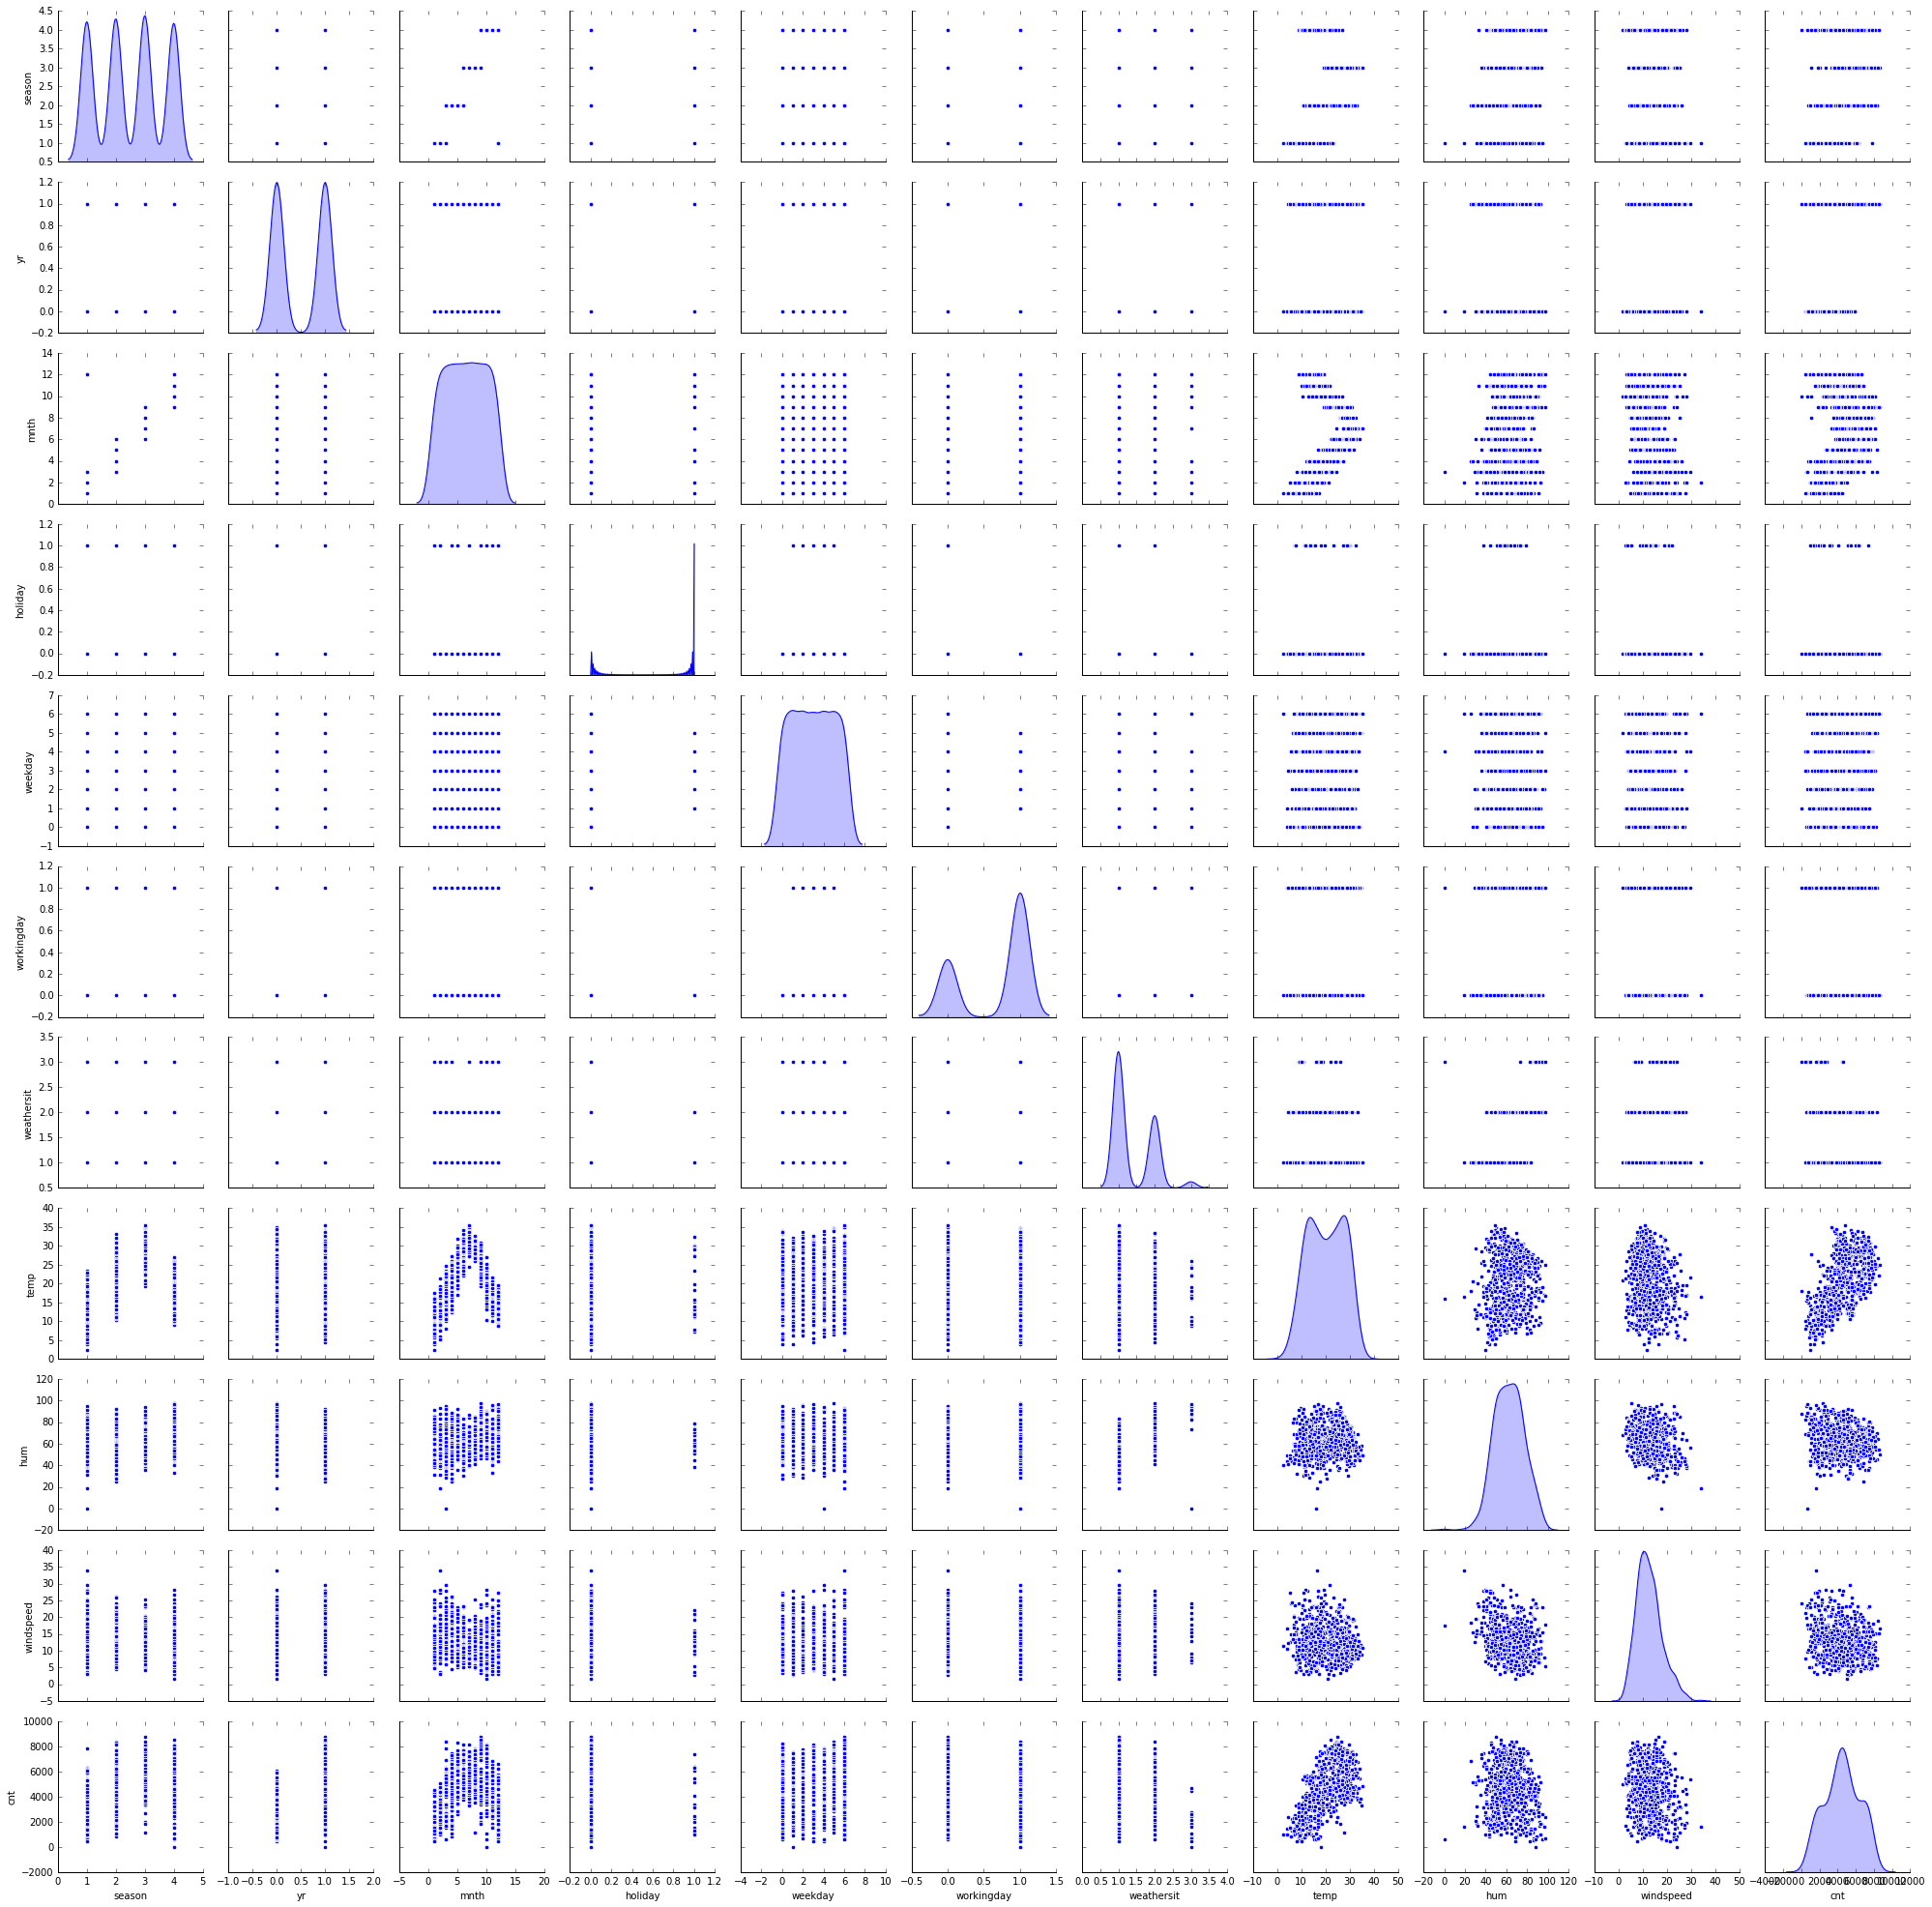

In [103]:
# drawing pair plot
plt.figure(figsize = (15, 30))
sns.pairplot(day_df, diag_kind = 'kde')
plt.show()

#### as part of the multiverient analysis
* as the humidity increase wind speed decrease.
* as the temp increase wind speed decrease
* in holidays wind speed is less

## Step 3: Data Preparation

In [104]:
# get the unique count of the column
day_df.nunique().sort_values(ascending=False)

cnt           695
windspeed     649
hum           594
temp          498
mnth           12
weekday         7
season          4
weathersit      3
workingday      2
holiday         2
yr              2
dtype: int64

* checking the unique values present in the column

In [105]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding
day_df = pd.get_dummies(day_df, columns=['season','mnth','weekday','weathersit'],drop_first=True)
day_df

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,0,0,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,59.0000,10.416557,3095,0,0,0,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,0,0,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0


* doing one hot encoding for 'season','mnth','weekday','weathersit' as the categorical veriable as got data like 1,2,3.4...there is some amount of ordering present to delete the stasistical significance of ordering we have done it.
* deleting the first row of one hot encoding as it is stastisticaly insignificant.

In [106]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

* after on hot encoding what is thee status of the data set

In [107]:
# get the unique count of the column
day_df.nunique().sort_values(ascending=False)

cnt             695
windspeed       649
hum             594
temp            498
weathersit_3      2
mnth_5            2
holiday           2
workingday        2
season_2          2
season_3          2
season_4          2
mnth_2            2
mnth_3            2
mnth_4            2
mnth_6            2
weathersit_2      2
mnth_7            2
mnth_8            2
mnth_9            2
mnth_10           2
mnth_11           2
mnth_12           2
weekday_1         2
weekday_2         2
weekday_3         2
weekday_4         2
weekday_5         2
weekday_6         2
yr                2
dtype: int64

* after one hot encoding what is the uniqueness of the binery columns

In [108]:
# Copy all the predictor variables into X dataframe
X = day_df.drop('cnt', axis=1)

# Copy the 'cnt' column alone into the y dataframe
y = day_df[['cnt']]


* deviding the data into predictor and target

In [109]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

* importing packages related to model

In [110]:
# Split X and y into training and test set in 70:30 ratio
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=100)

* devide the data into train test dataset.

In [111]:
scaler=preprocessing.MinMaxScaler()
X_train.iloc[:,3:6]=scaler.fit_transform(X_train.iloc[:,3:6])
y_train.iloc[:]=scaler.fit_transform(y_train.iloc[:])

* using minmax scaler as there is outlier presence in the data.

In [115]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* creating the linear regression model from sklearn to feed the data to recursive-feature-elimination

In [116]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 13),
 ('mnth_7', False, 3),
 ('mnth_8', False, 14),
 ('mnth_9', True, 1),
 ('mnth_10', False, 6),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

* generating rank till 15.

In [117]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

* taking the first 15 column accordance with the rank

In [118]:
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,1,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0,0,0,0,0


* deleting the perdictors based on RFE

#### Building model on test data to do manual feature selection

In [119]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.257588
yr              0.227437
holiday        -0.067154
workingday      0.023749
temp            0.592418
hum            -0.279574
windspeed      -0.201587
season_2        0.089082
season_4        0.145928
mnth_9          0.104027
weekday_1      -0.017410
weekday_2      -0.013946
weekday_3      -0.003613
weekday_4      -0.006330
weekday_5      -0.002106
weathersit_3   -0.196777
dtype: float64

* building of model with RFE parameter

In [120]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.07e-181
Time:                        18:59:46   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2576      0.027      9.543   

* as per the model significance goes model significance is quit high 
* F-statistic:                     174.7
* Adj. R-squared:                  0.827
* but there are some predictor which are less statisticaly significant in which
* weekday_5  P>|t|=0.855
* weekday_5 is most statically insignificant

In [121]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.95
3,temp,7.21
5,windspeed,3.59


* checking the multicollinearity through VIF 
* holiday	inf
*	workingday	inf
*	weekday_1	inf
*	weekday_2	inf
*	weekday_3	inf
*	weekday_4	inf
*	weekday_5	inf

### first we will delete the satisticaly insignificant column then one by one then we will look into VIF

In [122]:
X_train_rfe = X_train_rfe.drop('weekday_5', axis=1)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,1,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0,0,0,0


* droping weekday_5 as it is most statisticaly insignificant

In [123]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.257588
yr              0.227437
holiday        -0.069260
workingday      0.021642
temp            0.592418
hum            -0.279574
windspeed      -0.201587
season_2        0.089082
season_4        0.145928
mnth_9          0.104027
weekday_1      -0.015304
weekday_2      -0.011839
weekday_3      -0.001507
weekday_4      -0.004223
weathersit_3   -0.196777
dtype: float64

* building the Model with remaning predictor

In [124]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.07e-181
Time:                        18:59:55   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2576      0.027      9.543   

* as per the model significance goes model significance is quit high 
* F-statistic:                     174.7
* Adj. R-squared:                  0.827
* but there are some predictor which are less statisticaly significant in which
* weekday_3  P>|t|=0.923
* weekday_3 is most statically insignificant

In [125]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.95
2,workingday,7.47
3,temp,7.21
5,windspeed,3.59
9,weekday_1,2.29
11,weekday_3,2.27
12,weekday_4,2.06
10,weekday_2,2.05
0,yr,2.03
7,season_4,1.64


* checking the multicollinearity through VIF
*	hum	10.95
*	workingday	7.47
*   temp	7.21
* windspeed	3.59
* weekday_1	2.29
* weekday_3	2.27
* weekday_4	2.06
* weekday_2	2.05
* yr	2.03

In [126]:
X_train_rfe = X_train_rfe.drop('weekday_3', axis=1)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_4,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,1,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0,0,0


* droping weekday_3 as it is most statisticaly insignificant

In [127]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.257625
yr              0.227426
holiday        -0.070033
workingday      0.020810
temp            0.592423
hum            -0.279600
windspeed      -0.201570
season_2        0.089038
season_4        0.145913
mnth_9          0.103990
weekday_1      -0.014476
weekday_2      -0.011007
weekday_4      -0.003388
weathersit_3   -0.197002
dtype: float64

* building the Model with remaning predictor

In [128]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.48e-182
Time:                        19:00:02   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -958.3
Df Residuals:                     497   BIC:                            -898.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2576      0.027      9.555   

* as per the model significance goes model significance is quit high 
* F-statistic:                     188.5 increased
* Adj. R-squared:                  0.827
* but there are some predictor which are less statisticaly significant in which
* weekday_4  P>|t|=0.806
* weekday_4 is most statically insignificant

In [129]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.95
3,temp,7.21
2,workingday,4.52
5,windspeed,3.59
0,yr,2.03
7,season_4,1.64
9,weekday_1,1.64
6,season_2,1.58
10,weekday_2,1.47
11,weekday_4,1.47


* checking the multicollinearity through VIF
*	hum	10.95
*	workingday	4.52
*   temp	7.21
* windspeed	3.59
* yr	2.03

In [130]:
X_train_rfe = X_train_rfe.drop('weekday_4', axis=1)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0,0


* droping weekday_4 as it is most statisticaly insignificant

In [131]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.257381
yr              0.227428
holiday        -0.071385
workingday      0.019736
temp            0.592431
hum            -0.279224
windspeed      -0.201552
season_2        0.089076
season_4        0.145879
mnth_9          0.103921
weekday_1      -0.013371
weekday_2      -0.009942
weathersit_3   -0.197178
dtype: float64

* building the Model with remaning predictor

In [132]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.04e-183
Time:                        19:00:09   Log-Likelihood:                 493.10
No. Observations:                 511   AIC:                            -960.2
Df Residuals:                     498   BIC:                            -905.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2574      0.027      9.561   

* as per the model significance goes model significance is quit high 
* F-statistic:                     204.6 increased
* Adj. R-squared:                  0.827
* but there are some predictor which are less statisticaly significant in which
* weekday_2  P>|t|=0.446
* weekday_2 is most statically insignificant

In [133]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.21
2,workingday,3.74
5,windspeed,3.59
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.46
10,weekday_2,1.32
1,holiday,1.23


* checking the multicollinearity through VIF
*	hum	10.94
*	workingday	3.74
*   temp	7.21
* windspeed	3.59
* yr	2.03

In [134]:
X_train_rfe = X_train_rfe.drop('weekday_2', axis=1)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0


* droping weekday_2 as it is most statisticaly insignificant

In [135]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.258081
yr              0.227402
holiday        -0.073224
workingday      0.017324
temp            0.591975
hum            -0.279641
windspeed      -0.201941
season_2        0.088936
season_4        0.145654
mnth_9          0.104196
weekday_1      -0.011029
weathersit_3   -0.196235
dtype: float64

* building the Model with remaning predictor

In [136]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.12e-185
Time:                        19:00:16   Log-Likelihood:                 492.80
No. Observations:                 511   AIC:                            -961.6
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2581      0.027      9.597   

* as per the model significance goes model significance is quit high 
* F-statistic:                     223.4 increased
* Adj. R-squared:                  0.827
* but there are some predictor which are less statisticaly significant in which
* weekday_1  P>|t|=0.377
* weekday_1 is most statically insignificant

In [137]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.21
5,windspeed,3.59
2,workingday,3.36
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.38
1,holiday,1.22
8,mnth_9,1.20


* checking the multicollinearity through VIF
*	hum	10.94
*	workingday	3.74
*   temp	7.21
* windspeed	3.59
* yr	2.03

In [138]:
X_train_rfe = X_train_rfe.drop('weekday_1', axis=1)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0


* droping weekday_1 as it is most statisticaly insignificant

In [139]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.258768
yr              0.226965
holiday        -0.081711
workingday      0.015182
temp            0.592504
hum            -0.280617
windspeed      -0.202032
season_2        0.088760
season_4        0.145384
mnth_9          0.104455
weathersit_3   -0.195931
dtype: float64

* building the Model with remaning predictor

In [140]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.36e-186
Time:                        19:00:25   Log-Likelihood:                 492.40
No. Observations:                 511   AIC:                            -962.8
Df Residuals:                     500   BIC:                            -916.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2588      0.027      9.629   

* as per the model significance goes model significance is quit high 
* F-statistic:                     245.7 increased
* Adj. R-squared:                  0.828 increased
* but there are some predictor which are less statisticaly significant in which
* workingday  P>|t|=0.096
* workingday is most statically insignificant

In [141]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.20
5,windspeed,3.59
2,workingday,3.14
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
8,mnth_9,1.20
9,weathersit_3,1.09
1,holiday,1.08


* checking the multicollinearity through VIF
*	hum	10.94
*	workingday	3.14
*   temp	7.20
* windspeed	3.59
* yr	2.03

In [142]:
X_train_rfe = X_train_rfe.drop('workingday', axis=1)
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0
...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0
79,0,0,0.462664,0.759870,0.529881,1,0,0,0


* droping workingday as it is most statisticaly insignificant

## Step 4: Building model
#### Building the final model with this predictor hum VIF is high later point we will check what will happen if we delete hum

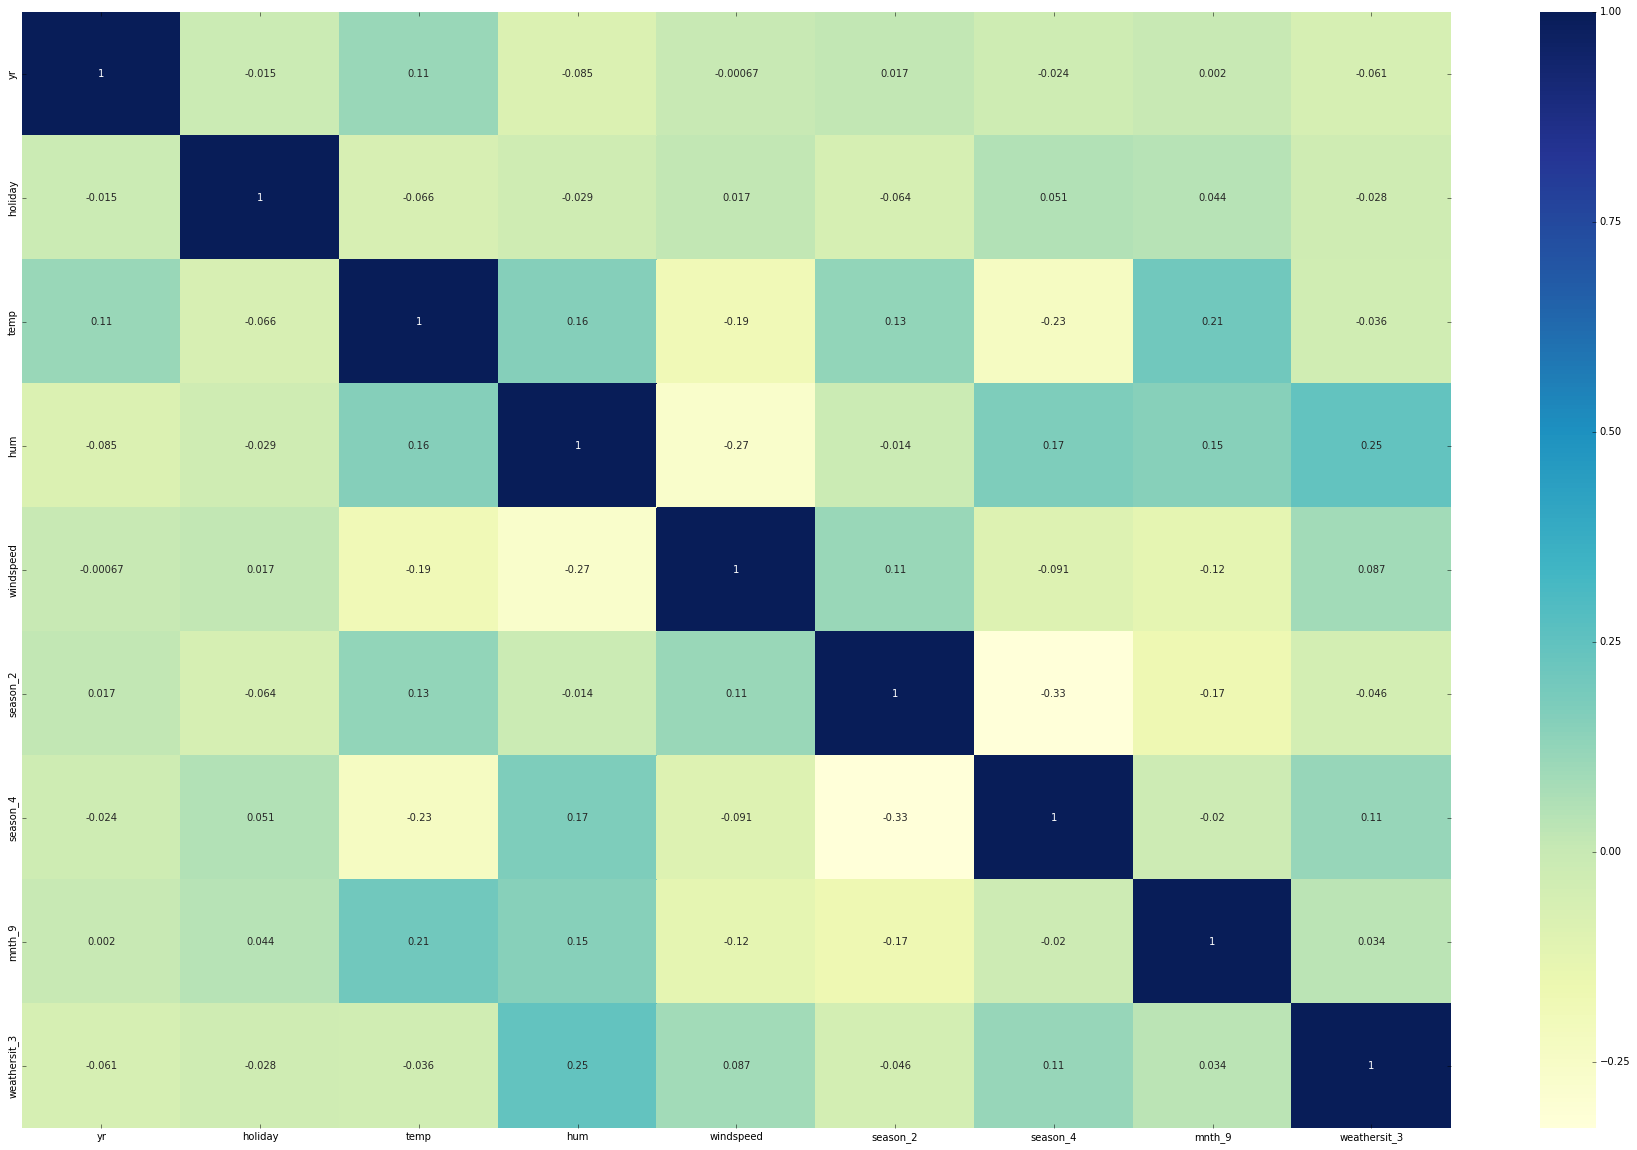

In [144]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

* no predictor having more than 80% corrletion.

In [145]:
#Build a linear model
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_with_constant).fit()
lr.params

const           0.268761
yr              0.227360
holiday        -0.091972
temp            0.593317
hum            -0.280003
windspeed      -0.203553
season_2        0.089134
season_4        0.144728
mnth_9          0.104967
weathersit_3   -0.194999
dtype: float64

* building the Model with remaning predictor

In [146]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.96e-186
Time:                        19:22:59   Log-Likelihood:                 490.99
No. Observations:                 511   AIC:                            -962.0
Df Residuals:                     501   BIC:                            -919.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2688      0.026     10.241   

* as per the model significance goes model significance is quit high 
* F-statistic:                     271.8 increased
* Adj. R-squared:                  0.827 
* all Predictor Are statstically significant

In [147]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,7.12
4,windspeed,3.54
0,yr,2.02
6,season_4,1.64
5,season_2,1.58
7,mnth_9,1.20
8,weathersit_3,1.09
1,holiday,1.04


* checking the multicollinearity through VIF
*	hum	10.02
*	workingday	3.54
*   temp	7.12
* windspeed	3.54
* yr	2.03

## Step 5: Residual Analysis of the train data

In [148]:
y_train_prd = lr.predict(X_train_rfe_with_constant)

* get the training target coulmn predicte dvalue

In [149]:
train_analysis_data=pd.concat([X_train_rfe, y_train-pd.DataFrame(y_train_prd,columns=['cnt'])], axis=1)
train_analysis_data.rename(columns = {'cnt':'res'}, inplace = True)
train_analysis_data['y_train_prd']=pd.DataFrame(y_train_prd,columns=['y_train_prediction'])
train_analysis_data['y_train']=y_train
train_analysis_data

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3,res,y_train_prd,y_train
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0.143197,0.721046,0.864243
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0.104939,0.722718,0.827658
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,-0.062115,0.527371,0.465255
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,-0.163011,0.367107,0.204096
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,-0.157410,0.640382,0.482973
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0.052511,0.780323,0.832835
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,-0.026226,0.244243,0.218017
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0.001545,0.311041,0.312586
79,0,0,0.462664,0.759870,0.529881,1,0,0,0,-0.075352,0.311776,0.236424


* creating a custom table which will have train predictor,predicted train target,train target,residual
#### checking the linear regression assumtions are satisfied or not

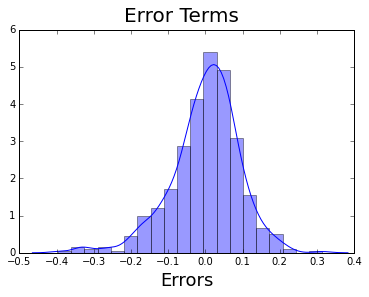

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(train_analysis_data['res'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

* error terms (residual) are mormally distributed

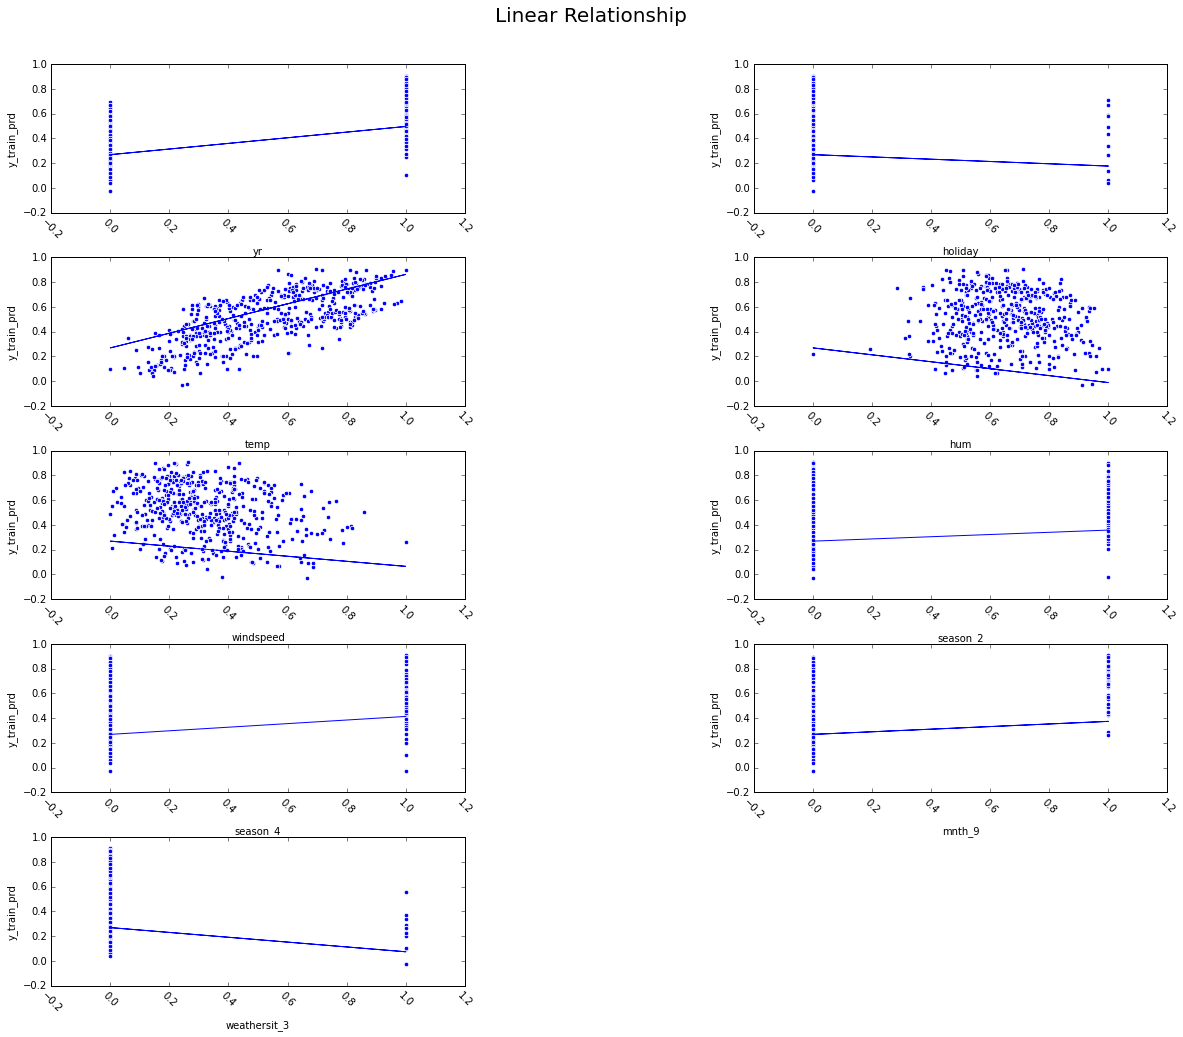

In [162]:
fig = plt.figure(figsize=(20,16))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .7,    # the amount of width reserved for blank space between subplots
    hspace =  0.3    # the amount of height reserved for white space between subplots
)
plt.suptitle("Linear Relationship", y = .95, fontsize=20)
for feature in train_analysis_data.columns: 
    if str(feature) not in ['res','y_train_prd','y_train']:
        plt.subplot(5, 2, count+1)
        sns.scatterplot(x=feature, y='y_train_prd', data=train_analysis_data)
        if str(feature)=='yr':
            plt.plot(train_analysis_data[feature], [0.227360*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='holiday':
            plt.plot(train_analysis_data[feature], [-0.091972*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='temp':
            plt.plot(train_analysis_data[feature], [0.593317*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='hum':
            plt.plot(train_analysis_data[feature], [-0.280003*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='windspeed':
            plt.plot(train_analysis_data[feature], [-0.203553*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='season_2':
            plt.plot(train_analysis_data[feature], [0.089134*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='season_4':
            plt.plot(train_analysis_data[feature], [0.144728*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='mnth_9':
            plt.plot(train_analysis_data[feature], [0.104967*x+0.268761 for x in train_analysis_data[feature]])
        if str(feature)=='weathersit_3':
            plt.plot(train_analysis_data[feature], [-0.194999*x+0.268761 for x in train_analysis_data[feature]])
        plt.xticks(rotation=-45)
        count=count+1
plt.show()


* from this graphs one can say there is linear relationship between predictor and predicted there is some exception in hum and wind speed because of high VIF.

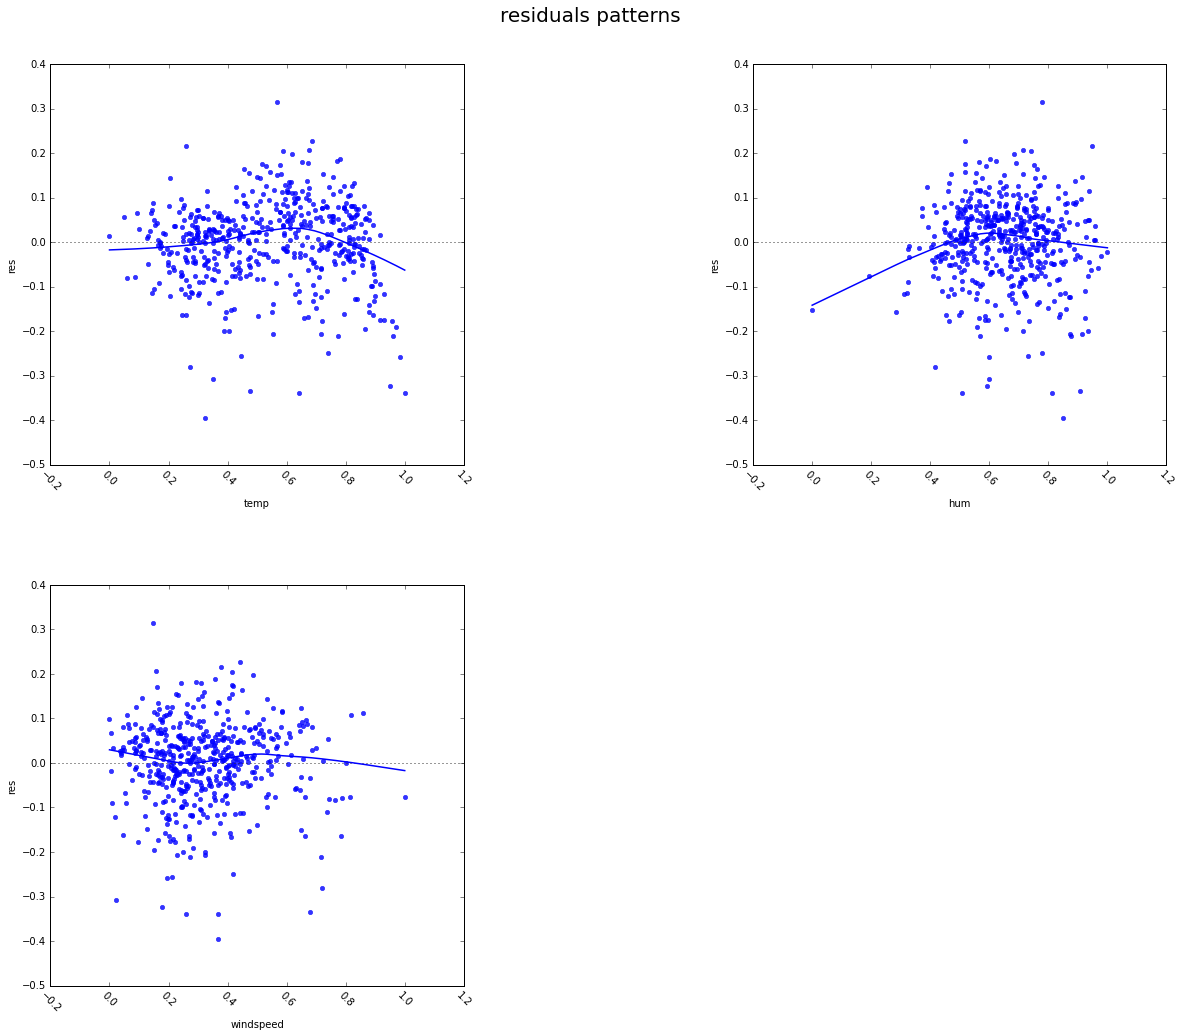

In [163]:
fig = plt.figure(figsize=(20,16))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .7,    # the amount of width reserved for blank space between subplots
    hspace =  0.3    # the amount of height reserved for white space between subplots
)
plt.suptitle("residuals patterns", y = .95, fontsize=20)
for feature in train_analysis_data.columns: 
    if str(feature) in ['temp','hum','windspeed']:
        plt.subplot(2, 2, count+1)
        sns.residplot(x=feature, y='res', data=train_analysis_data,lowess=True)
        plt.xticks(rotation=-45)
        count=count+1
plt.show()

* residuals are more independent with the predictor

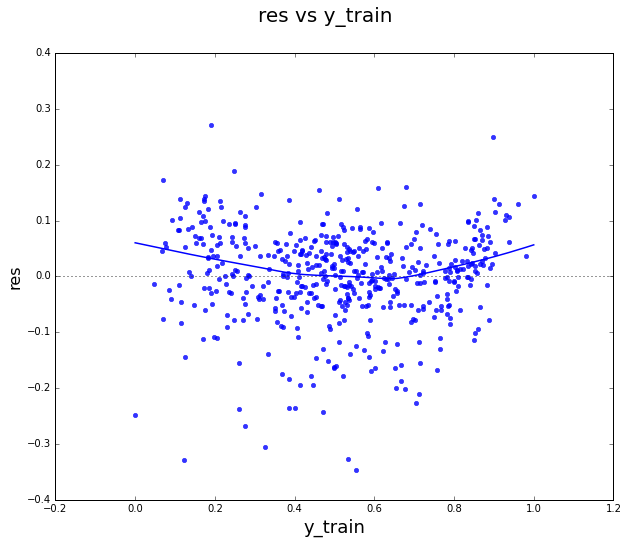

In [164]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,8))
sns.residplot(x='y_train', y='res', data=train_analysis_data,lowess=True)
fig.suptitle('res vs y_train', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('res', fontsize = 16) 
plt.show()

* residuals are more indipendent with the target train and the spread is with constant varience

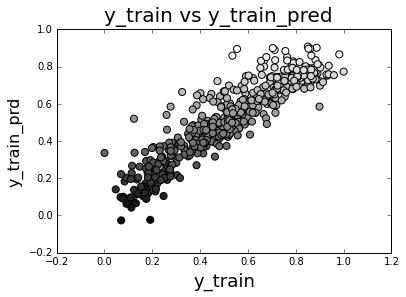

In [165]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_prd, c=y_train_prd, s=50, edgecolors="black")
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_prd', fontsize = 16) 
plt.gray()

### QQ-plot

* target train,target train predicted are having constant varience

## Step 6: Making Predictions Using the Final Model

* Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [166]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_final = X_test.drop(['workingday','season_3','mnth_2', 'mnth_3', 'mnth_4', 'mnth_5','mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],axis=1)
X_test_final_dummy=X_test_final
X_test_final_dummy

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
184,0,1,29.793347,63.7917,5.459106,0,0,0,0
535,1,0,32.082500,59.2083,7.625404,1,0,0,0
299,0,0,19.270000,81.2917,13.250121,0,1,0,0
221,0,0,31.433347,42.4167,13.417286,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,1,0,0,0
...,...,...,...,...,...,...,...,...,...
400,1,0,10.899153,68.7917,11.791732,0,0,0,0
702,1,0,19.509153,73.3750,11.666643,0,1,0,0
127,0,0,21.661653,63.1667,5.000712,1,0,0,0
640,1,0,26.957500,79.3750,4.458569,0,1,0,0


* droping the unnecessery column from the test predictor as per previous analysis

In [167]:
X_test=scaler.fit_transform(X_test_final)
y_test=scaler.fit_transform(y_test)

* using minmax scaler on test set

In [168]:
# Adding a constant variable 
X_test_final = sm.add_constant(X_test)
# Making predictions
y_pred = lr.predict(X_test_final)

* making the prediction on test data

In [169]:
r2=r2_score(y_true=y_test,y_pred=y_pred)
r2

0.7978970150656509

In [170]:
1-(1-r2)/(1-pd.DataFrame(X_test_final).columns.stop/(len(X_test_final)-1))

0.7881805254053457

* addjusted r2 score is quit high
Formula
  =1-(1-r2)*(n-1)/(n-p-1)=1-(1-r2)/(1-p/n-1)

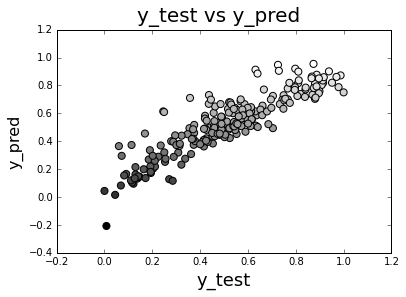

In [171]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, c=y_pred, s=50, edgecolors="black")
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.gray()

* target test,target test predicted are having more or less constant varience

We can see that the equation of our best fitted line is:

$ cnt = 0.227360  \times  yr - 0.091972  \times  holiday + 0.593317 \times temp - 0.280003 \times hum - 0.203553 \times windspeed + 0.089134 \times season_2(summer) + 0.144728 \times season_4(winter) + 0.104967 \times mnth_9(september) - 0.194999 \times weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)$

## Testing aditional scenerio if we had delete Hum

In [172]:
X_train_rfe_new = X_train_rfe.drop('hum', axis=1)
X_train_rfe_new

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
653,1,0,0.509887,0.300794,0,1,0,0
576,1,0,0.815169,0.264686,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0
...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0
79,0,0,0.462664,0.529881,1,0,0,0


* deleting hum from train as the VIF is high

In [173]:
#Build a linear model
X_train_rfe_with_constant_1 = sm.add_constant(X_train_rfe_new)
lr_1 = sm.OLS(y_train, X_train_rfe_with_constant_1).fit()
lr_1.params

const           0.086969
yr              0.234088
holiday        -0.087151
temp            0.568619
windspeed      -0.145262
season_2        0.081065
season_4        0.127496
mnth_9          0.089127
weathersit_3   -0.254138
dtype: float64

* building the model on train

In [174]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.24e-172
Time:                        20:11:43   Log-Likelihood:                 454.12
No. Observations:                 511   AIC:                            -890.2
Df Residuals:                     502   BIC:                            -852.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0870      0.017      4.988   

* as per the model significance goes model significance is quit decreased 
* F-statistic:                     256.8 decreased drastically
* Adj. R-squared:                  0.800 decreased drastically

In [175]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


* Vif value seams fine except we can check on temp,windspeed

In [176]:
y_train_validate_cnt = lr_1.predict(X_train_rfe_with_constant_1)

* predicting value on train

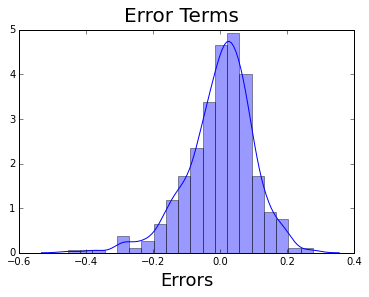

In [177]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-pd.DataFrame(y_train_validate_cnt,columns=['cnt'])), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

* residual distribution slightly more skewed that previous itteration

In [178]:
# Creating X_test_new dataframe by dropping hum from X_test
X_test_final_1 = X_test_final_dummy.drop(['hum'],axis=1)
X_test_final_1

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
184,0,1,29.793347,5.459106,0,0,0,0
535,1,0,32.082500,7.625404,1,0,0,0
299,0,0,19.270000,13.250121,0,1,0,0
221,0,0,31.433347,13.417286,0,0,0,0
152,0,0,29.315000,19.583229,1,0,0,0
...,...,...,...,...,...,...,...,...
400,1,0,10.899153,11.791732,0,0,0,0
702,1,0,19.509153,11.666643,0,1,0,0
127,0,0,21.661653,5.000712,1,0,0,0
640,1,0,26.957500,4.458569,0,1,0,0


* deleting hum from test

In [179]:
X_test_1=scaler.fit_transform(X_test_final_1)

* scalling the test data

In [180]:
# Adding a constant variable 
X_test_1 = sm.add_constant(X_test_1)
# Making predictions
y_pred_validating = lr_1.predict(X_test_1)

* predigting the value based on test

In [181]:
r2_checking=r2_score(y_true=y_test,y_pred=y_pred_validating)
r2_checking

0.763759141608947

In [182]:
1-(1-r2_checking)/(1-pd.DataFrame(X_test_1).columns.stop/(len(X_test_1)-1))

0.7535860902906719

* decrease in adj R2 score in test data

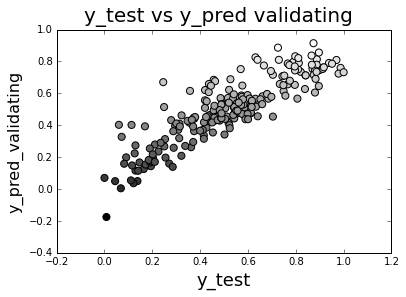

In [183]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_validating, c=y_pred_validating, s=50, edgecolors="black")
fig.suptitle('y_test vs y_pred validating', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_validating', fontsize = 16) 
plt.gray()

* target test,target test predicted are having  less constant varience reletive to previous case

## Conclusion
* the best fitted line derived by
$ cnt = 0.227360  \times  yr - 0.091972  \times  holiday + 0.593317 \times temp - 0.280003 \times hum - 0.203553 \times windspeed + 0.089134 \times season_2(summer) + 0.144728 \times season_4(winter) + 0.104967 \times mnth_9(september) - 0.194999 \times weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)$
* gives the best mode
* if we delete any more prodictor based on multicolinerity the model performance gets hampered.